In [1]:
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc

In [2]:
# energy calibration
# get filepath of all calibration data
energy_path = 'Stationary_Scintillator/'

Na_file = energy_path + 'Na_22_Calibration_Spectrum_4.TKA'
df_Na = pd.read_csv(Na_file, header=None)
N_Na = np.array(df_Na[0][2:])
t_Na = df_Na[0][0]  # live time [s]

Co_file = energy_path + 'Co_60_Calibration_Spectrum_4.TKA'
df_Co = pd.read_csv(Co_file, header=None)
N_Co = np.array(df_Co[0][2:])
t_Co = df_Co[0][0]  # live time [s]

Pd_file = energy_path + 'Pd_106_Spectrum_3.TKA'
df_Pd = pd.read_csv(Pd_file, header=None)
N_Pd = np.array(df_Pd[0][2:])
t_Pd = df_Pd[0][0]  # live time [s]

N_under = np.zeros((16382))  # empty array, later: underground
t_under = 10788  # has to be adjusted

In [3]:
def counting_rate(N, t):
    '''Calculate counting rate and uncertainty'''
    n = N / t
    u_n = np.sqrt(N) / t
    return n, u_n


def corrected_rate(N, t):
    '''Calculate counting rate corrected for underground with uncertainty'''
    n_raw, u_raw = counting_rate(N, t)
    n_under, u_under = counting_rate(N_under, t_under)

    n_corr = n_raw - n_under
    n_corr = np.where(n_corr>0, n_corr, 0)
    u_corr = np.sqrt(u_raw**2 + u_under**2)

    return n_corr, u_corr

In [4]:
n_Na, u_Na = corrected_rate(N_Na, t_Na)
n_Co, u_Co = corrected_rate(N_Co, t_Co)
n_Pd, u_Pd = corrected_rate(N_Pd, t_Pd)

In [5]:
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2)) + B

def linear_fct(x, m, c):
    return m * x + c

/usr/local/sage/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/sage/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma


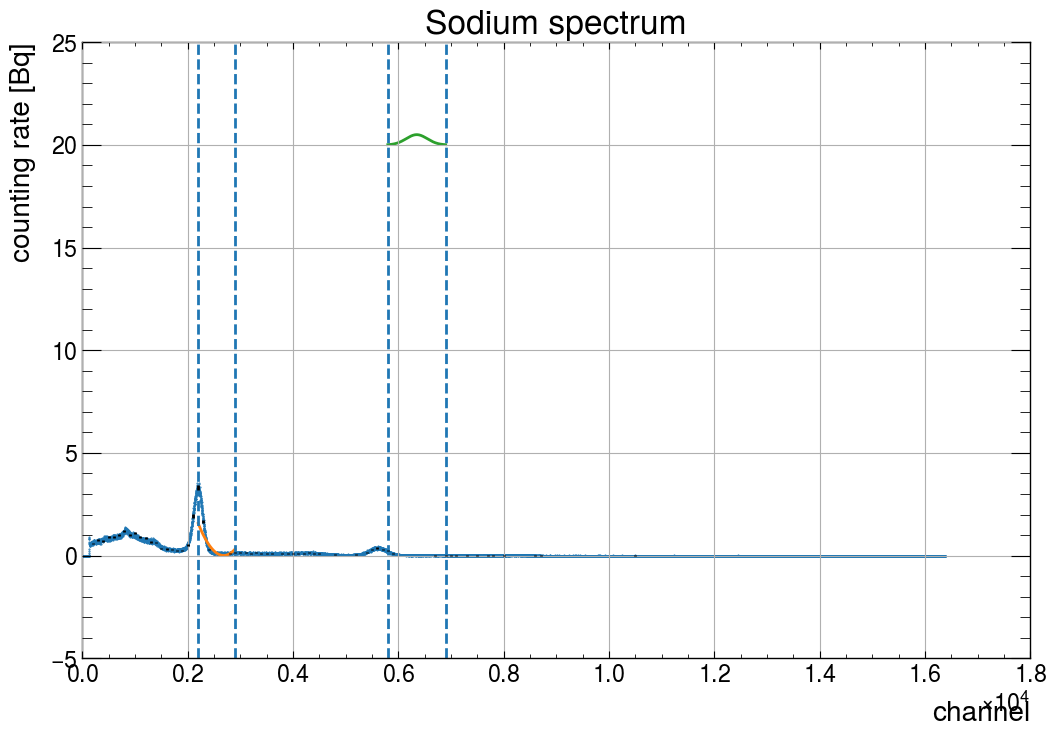

[-22542.01846447   2684.33487027  41014.62446546  22542.02210901] [inf inf inf inf]
[5.00e-01 6.35e+03 2.00e+02 2.00e+01] [inf inf inf inf]


In [6]:
# Analysis of the sodium spectrum
channels = np.arange(1, len(N_Na)+1, 1)
a1, b1 = 2200, 2900  # 3000, 3800
a2, b2 = 5800, 6900  # 7700, 8650

coeffs_Na1, cov_Na1 = sc.curve_fit(gauss, channels[a1:b1], n_Na[a1:b1],
                                   sigma=u_Na[a1:b1], absolute_sigma=True,
                                   p0=(2, 0.5*(a1+b1), 120, 150))
coeffs_Na2, cov_Na2 = sc.curve_fit(gauss, channels[a2:b2], n_Na[a2:b2],
                                   sigma=u_Na[a2:b2], absolute_sigma=True,
                                   p0=(0.5, 0.5*(a2+b2), 200, 20))


fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Na[0:-1:error_step],
            yerr=u_Na[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Na, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Na1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Na2))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')

ax.set_title('Sodium spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

ax.grid()

plt.show()
print(coeffs_Na1, np.sqrt(np.diagonal(cov_Na1)))
print(coeffs_Na2, np.sqrt(np.diagonal(cov_Na2)))

/usr/local/sage/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/usr/local/sage/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


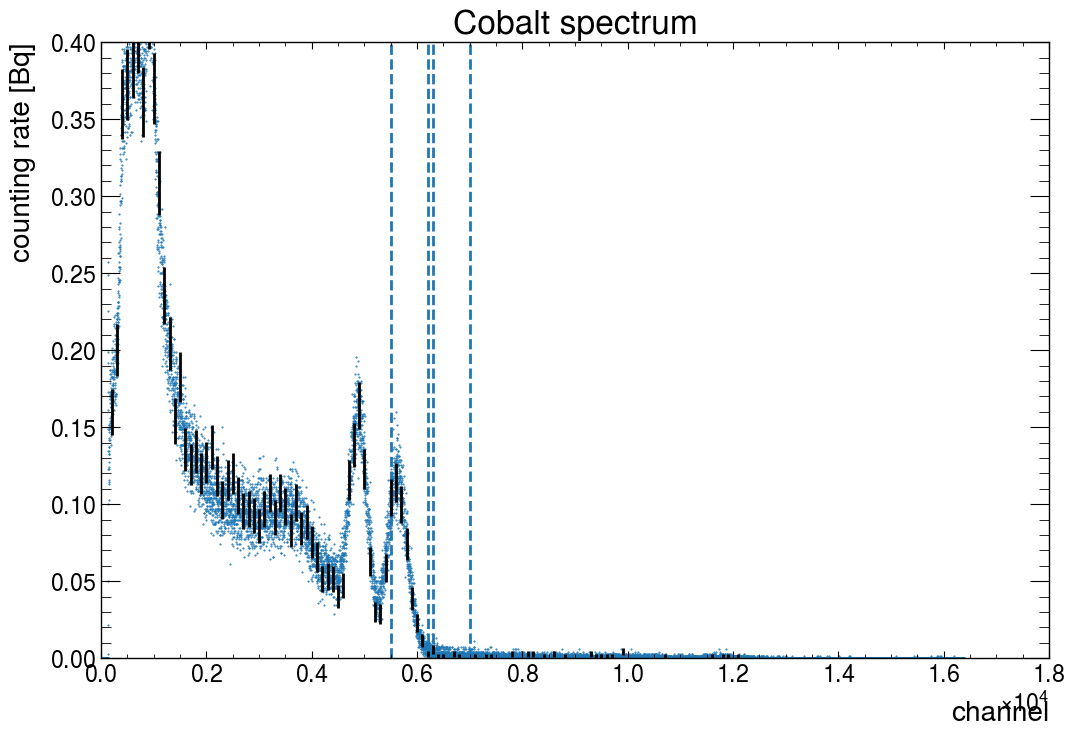

[2.00e-01 5.85e+03 2.00e+02 1.50e+01] [inf inf inf inf]
[2.00e-01 6.65e+03 2.00e+02 2.00e+01] [inf inf inf inf]


In [7]:
# Analysis of the Cobalt spectrum
channels = np.arange(1, len(N_Co)+1, 1)
a1, b1 = 5500, 6200
a2, b2 = 6300, 7000

fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Co[0:-1:error_step],
            yerr=u_Co[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Co, lw=0, marker = '.', ms = 1)


ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')


coeffs_Co1, cov_Co1 = sc.curve_fit(gauss, channels[a1:b1], n_Co[a1:b1],
                                   sigma=u_Co[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a1+b1), 200, 15))
coeffs_Co2, cov_Co2 = sc.curve_fit(gauss, channels[a2:b2], n_Co[a2:b2],
                                   sigma=u_Co[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a2+b2), 200, 20))

ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Co1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Co2))


ax.set_ylim((0, 0.4))

ax.set_title('Cobalt spectrum')
ax.set_xlabel('channel') 
ax.set_ylabel('counting rate [Bq]')

plt.show()
print(coeffs_Co1, np.sqrt(np.diagonal(cov_Co1)))
print(coeffs_Co2, np.sqrt(np.diagonal(cov_Co2)))

In [8]:
energies = np.array([511, 1274.6, 1173.2, 1332.5])
ch_num = np.array([coeffs_Na1[1], coeffs_Na2[1], coeffs_Co1[1], coeffs_Co2[1]])

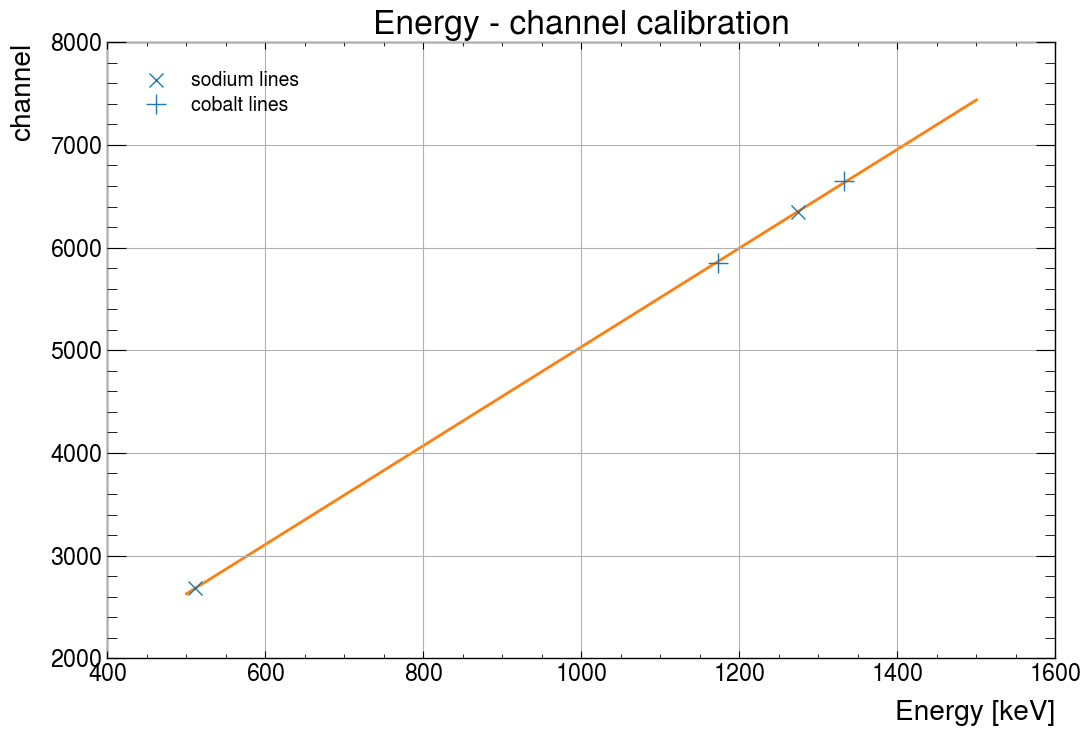

In [9]:
coeffs_lin, cov_lin = sc.curve_fit(linear_fct, energies, ch_num)

e_axis = np.linspace(500, 1500, 1001)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(e_axis, linear_fct(e_axis, *coeffs_lin), c='C1')
ax.plot(energies[:2], ch_num[:2], marker = 'x', ms=10, lw = 0, label = 'sodium lines', c='C0')
ax.plot(energies[2:], ch_num[2:], marker = '+', ms=14, lw = 0, label = 'cobalt lines', c='C0')

ax.set_title('Energy - channel calibration')
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('channel')
ax.legend()
ax.grid()
plt.show()

In [10]:
def energy(channel):
    m, c = coeffs_lin
    return (channel - c) / m


def u_energy(channel, u_channel=1):
    m, c = coeffs_lin
    u_m, u_c = np.sqrt(np.diagonal(cov_lin))
    return np.sqrt((u_channel/m)**2 + (u_c/m)**2 + (u_m*(channel-c)/m**2)**2)

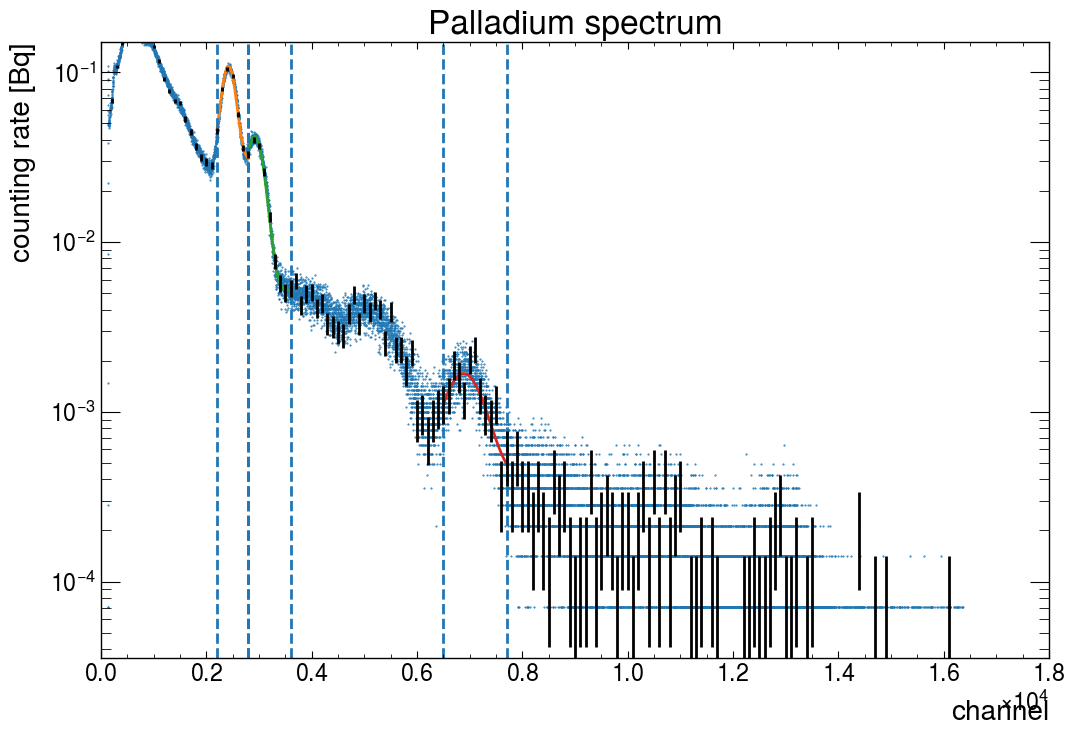

[7.79061474e-02 2.42233396e+03 1.22844156e+02 3.02999535e-02] [2.58029270e-04 3.50916187e-01 5.46543132e-01 2.00252313e-04]
[3.65908151e-02 2.91681280e+03 1.67306598e+02 5.15484706e-03] [1.19467421e-04 1.17012669e+00 9.99787151e-01 4.31750335e-05]
[1.27424087e-03 6.88592745e+03 3.54091173e+02 4.03876736e-04] [3.38402745e-05 6.30165200e+00 1.37398324e+01 3.69911785e-05]


In [11]:
# Analysis of the Palladium spectrum
channels = np.arange(1, len(N_Pd)+1, 1)
a1, b1 = 2200, 2800
a2, b2 = 2800, 3600
a3, b3 = 6500, 7700

coeffs_Pd1, cov_Pd1 = sc.curve_fit(gauss, channels[a1:b1], n_Pd[a1:b1],
                                   sigma=u_Pd[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a1+b1), 200, 15))
coeffs_Pd2, cov_Pd2 = sc.curve_fit(gauss, channels[a2:b2], n_Pd[a2:b2],
                                   sigma=u_Pd[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a2+b2), 200, 20))
coeffs_Pd3, cov_Pd3 = sc.curve_fit(gauss, channels[a3:b3], n_Pd[a3:b3],
                                   sigma=u_Pd[a3:b3], absolute_sigma=False,
                                   p0=(0.002, 0.5*(a3+b3), 200, 0.001))

fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Pd1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Pd2))
ax.plot(channels[a3:b3], gauss(channels[a3:b3], *coeffs_Pd3))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')
ax.axvline(channels[a3], ls = '--')
ax.axvline(channels[b3], ls = '--')

ax.set_ylim((.5/t_Pd, 0.15))
ax.set_yscale('log')

ax.set_title('Palladium spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

plt.show()
print(coeffs_Pd1, np.sqrt(np.diagonal(cov_Pd1)))
print(coeffs_Pd2, np.sqrt(np.diagonal(cov_Pd2)))
print(coeffs_Pd3, np.sqrt(np.diagonal(cov_Pd3)))

In [12]:
print(energy(coeffs_Pd1[1]), '+-', u_energy(coeffs_Pd1[1]), 'keV')
print(energy(coeffs_Pd2[1]), '+-', u_energy(coeffs_Pd2[1]), 'keV')
print(energy(coeffs_Pd3[1]), '+-', u_energy(coeffs_Pd3[1]), 'keV')

457.2626638363178 +- 6.61174645153901 keV
560.0512071581738 +- 6.842875439233436 keV
1385.1209206611893 +- 9.723843344858825 keV


In [13]:
### Source for Pd Term sceme:
# Abb.2.11 on p. 38
# http://iktp.tu-dresden.de/IKTP/pub/09/Marcel_Heine_-_Eine_Suche_nach_Doppelbeta-Zerfaellen_von_Cadmium-_%20Zink_und%20Tellur-_Isotopen_mit_Positronen-Emission.pdf

# both lines identified! Nice!!

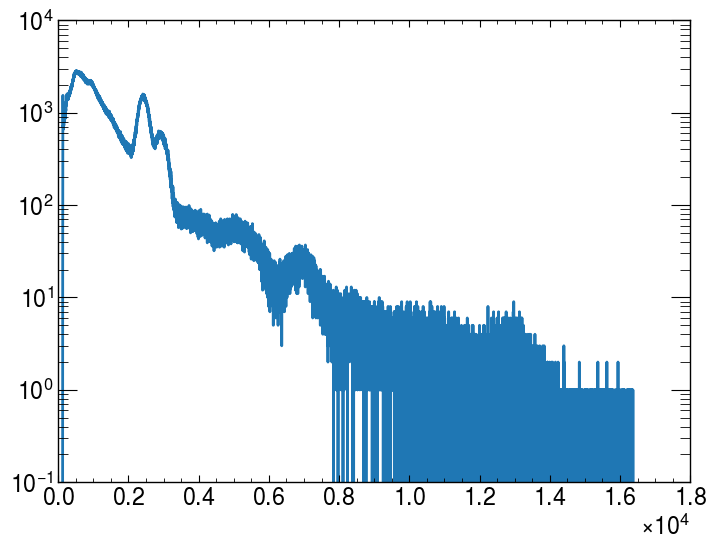

In [14]:
fig, ax = plt.subplots()

ax.plot(channels, N_Pd)
ax.set_yscale('log')